In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


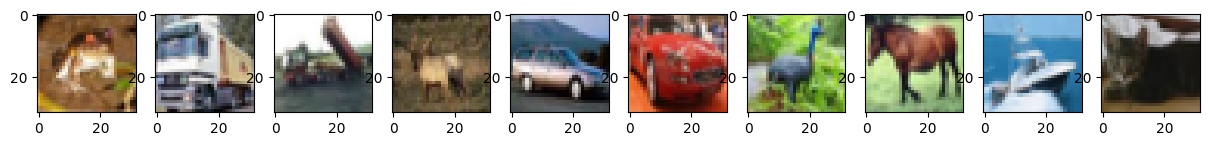

In [4]:
plt.figure(figsize=(15, 15))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(x_train[i])

In [5]:
# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
from numpy import add
model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Input(shape=(32, 32, 3)))
model_cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model_cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
model_cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [7]:
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,250 (1.08 MB)

 Trainable params: 282,250 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
loss_function = tf.keras.losses.BinaryFocalCrossentropy()
model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=loss_function,
                  metrics=['accuracy'])

In [9]:
model_cnn.fit(x_train, y_train, batch_size=256, epochs=10, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.2825 - loss: 0.0312 - val_accuracy: 0.5037 - val_loss: 0.0259
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5347 - loss: 0.0253 - val_accuracy: 0.5663 - val_loss: 0.0243
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5945 - loss: 0.0238 - val_accuracy: 0.6177 - val_loss: 0.0233
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6314 - loss: 0.0228 - val_accuracy: 0.6307 - val_loss: 0.0228
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6640 - loss: 0.0218 - val_accuracy: 0.6572 - val_loss: 0.0220
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6871 - loss: 0.0208 - val_accuracy: 0.6693 - val_loss: 0.0216
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7012 - loss: 0.0203 - val_accuracy: 0.6887 - val_loss: 0.0210
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7167 - loss: 0.0195 - val_acc

In [10]:
model_vgg = tf.keras.applications.vgg16.VGG16(include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
model_vgg = tf.keras.models.Sequential(model_vgg.layers)
model_vgg.add(tf.keras.layers.Flatten())
model_vgg.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model_vgg.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,719,818 (56.15 MB)

 Trainable params: 14,719,818 (56.15 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model_vgg.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=loss_function,
                  metrics=['accuracy'])

In [13]:
model_vgg.fit(x_train, y_train, batch_size=256, epochs=10, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 54s 190ms/step - accuracy: 0.1183 - loss: 0.0410 - val_accuracy: 0.1364 - val_loss: 0.0293
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 24s 121ms/step - accuracy: 0.1537 - loss: 0.0291 - val_accuracy: 0.2551 - val_loss: 0.0283
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 24s 123ms/step - accuracy: 0.2788 - loss: 0.0279 - val_accuracy: 0.3836 - val_loss: 0.0268
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 25s 125ms/step - accuracy: 0.3928 - loss: 0.0263 - val_accuracy: 0.5180 - val_loss: 0.0237
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 25s 125ms/step - accuracy: 0.4841 - loss: 0.0238 - val_accuracy: 0.5787 - val_loss: 0.0213
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 24s 125ms/step - accuracy: 0.5902 - loss: 0.0208 - val_accuracy: 0.6322 - val_loss: 0.0202
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 24s 125ms/step - accuracy: 0.6573 - loss: 0.0187 - val_accuracy: 0.6867 - val_loss: 0.0184
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 25s 125ms/step - accuracy: 0.7122 - loss: 0